<a href="https://colab.research.google.com/github/parvvaresh/K-Means-Clustering-Algorithm-from-Scratch-in-Python/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
class k_means:
  def __init__(self, k = 2, tol = 0.001, max_iter = 300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter
  def fit(self, data):

    self.centers = {}
    for index in range(0, self.k):
      self.centers[index] = data[index]
    
    self.classifications = {}
    for index in range(0, self.k):
      self.classifications[index] = []

    for _e in range(0, self.max_iter):

      for feature in data:

        distance = [(np.linalg.norm(feature - self.centers[center])) for center in self.centers]
        classification = distance.index(min(distance))
        self.classifications[classification].append(feature)
      

      centers_copy = self.centers.copy()
      check = True

      for classification in self.classifications:
        self.centers[classification] = np.average(self.classifications[classification], axis = 0)
      
      
      
      for center in self.centers:
        original_centroid = centers_copy[center]
        current_centroid = self.centers[center]
        if np.sum((current_centroid-original_centroid)/original_centroid * 100.0) > self.tol:
          print(np.sum((current_centroid-original_centroid)/original_centroid * 100.0))
          check = False
      
      if check == False:
        break
    
  def predict(self, data):
    distance = [(np.linalg.norm(data - self.centers[center])) for center in self.centers]
    classification = distance.index(min(distance))
    self.classifications[classification].append(data)            

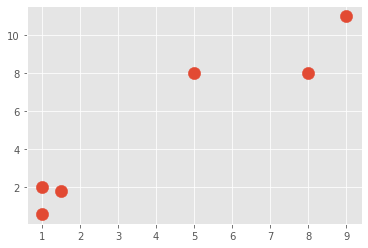

In [15]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [16]:
model = k_means()
model.fit(X)

453.3333333333334


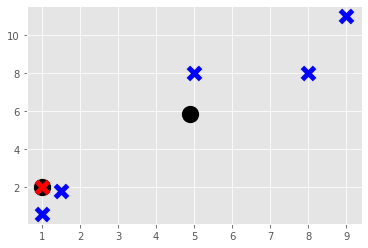

In [13]:
for center in model.centers:
    plt.scatter(model.centers[center][0], model.centers[center][1],
                marker="o", color="k", s=150, linewidths=5)


colors = {
    0 : "red",
    1 : "blue"
}
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()